In [1]:
import os
# KMeans 算法在使用 MKL 的 Windows 系统上存在内存泄漏问题
# 设置下面的环境变量进行限制，避免问题
os.environ['OMP_NUM_THREADS'] = "1"  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
dataset = pd.read_csv('data/鸢尾花.csv')
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),种类
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
dataset.describe() # 观察数据，选择方差较大的

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),种类
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# 选择样本和标签，这里标签之后用来绘图，并不是参与训练
sub_df = dataset[['sepal length (cm)', 'petal length (cm)', '种类']]
X = sub_df.iloc[:,:-1].values # 需要聚类的数据样本
y = sub_df.iloc[:,-1].values  # 用来绘图的标签
sub_df.head()

,sepal length (cm),petal length (cm),种类
0,5.1,1.4,0.0
1,4.9,1.4,0.0
2,4.7,1.3,0.0
3,4.6,1.5,0.0
4,5.0,1.4,0.0


In [7]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [8]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

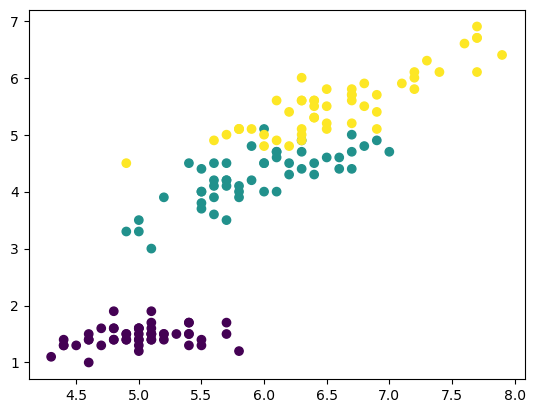

In [9]:
# 可视化数据样本，使用散点图，并用标签设置散点的颜色
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [10]:
k = 3  # 设置簇的数量，后续会讨论为什么选择3个
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, n_init='auto', random_state=42)

In [11]:
# 在数据集上“拟合”：
# 实际为 
# 1、初始化参数
# 2、迭代更新簇中心，直到满足终止条件。
# 3、预测每个样本的簇标签
model.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [12]:
# “拟合”后，可以获得聚类结果，
# 其中包括数据样本的簇和各个簇的质心
clusters = model.labels_
centroids = model.cluster_centers_


In [13]:
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [14]:
print(centroids)

[[6.83902439 5.67804878]
 [5.00784314 1.49215686]
 [5.87413793 4.39310345]]


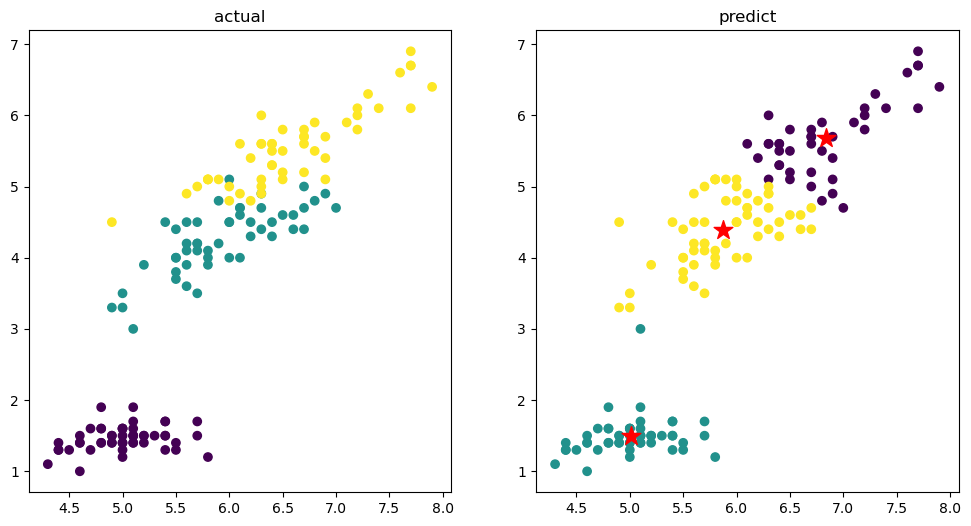

In [15]:
# 接着使用matplotlib，
# 绘制“拟合”后的数据样本的簇标签和各个簇的质心
# 设置多个子图模式，1行2列
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# 第1个坐标轴，绘制样本散点图，并设置颜色为y
ax[0].scatter(X[:, 0], X[:, 1], c=y)
# 设置标题
ax[0].set_title('actual')

# 第2个坐标轴，绘制样本散点图，并设置颜色为聚类后的簇
ax[1].scatter(X[:, 0], X[:, 1], c=clusters)
# 同时绘制不同簇的质心，散点的形状为星星，颜色为红色
ax[1].scatter(centroids[:, 0], centroids[:, 1],
              marker='*', s=200, c='#FF0000', )
# 设置标题
ax[1].set_title('predict')
plt.show()

k=1, SSE=23.801128824770757, inertia=566.4937333333332
k=2, SSE=14.1086169493387, inertia=112.99207175925925
k=3, SSE=12.511480301803205, inertia=53.80997864410694
k=4, SSE=11.644919526369858, inertia=34.31702077922079
k=5, SSE=11.157409296360004, inertia=25.802454427925
k=6, SSE=11.272372264202028, inertia=22.72412034739455


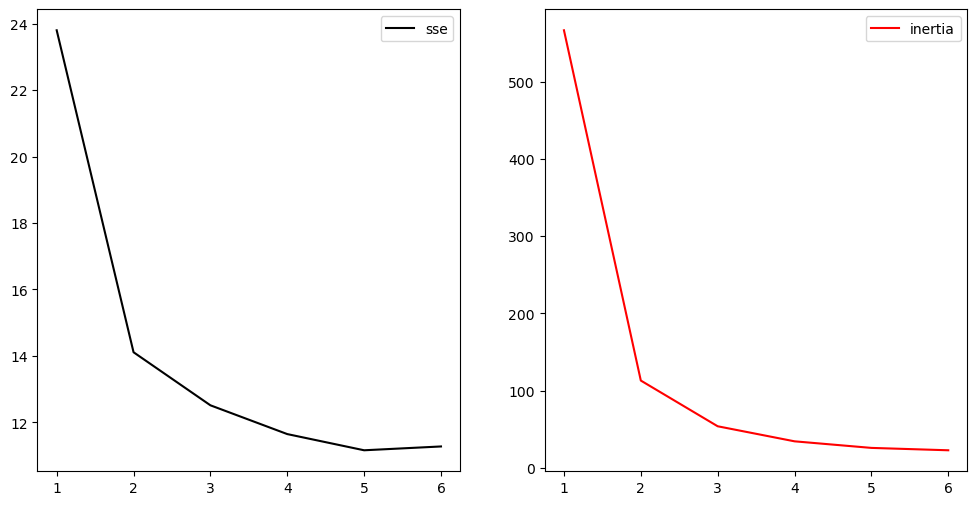

In [16]:
import numpy as np

# 设置不同的k值的列表
k_list = list(range(1, 7))
# 创建相同大小的列表，用来记录不同k值对应的SSE
sse_list = [0] * len(k_list)
inertia_list = [0] * len(k_list)

# k的范围从1到6。然后，我们训练数据样本
# 模型并分别记录生成的 SSE：

for k_ind, k in enumerate(k_list):
    # 进行聚类
    model = KMeans(n_clusters=k, n_init='auto',random_state=42)
    model.fit(X)
    # 获取聚类后的簇标签
    cluster = model.labels_
    # 获取聚类后的不同簇的质心
    centroids = model.cluster_centers_
    
    # 记录在当前k值下，所有簇的SSE之和
    sse = 0
    for i in range(k):
        # 某一个簇的样本索引
        cluster_i = np.where(cluster == i)
        # 记录该簇的SSE，并累加到整体的SSE中
        sse += np.linalg.norm(X[cluster_i] - centroids[i])
    
    
    # 记录到存储SSE值的列表中
    sse_list[k_ind] = sse
    # 模型自带的inertia_
    inertia_list[k_ind] = model.inertia_
        # 输出
    print('k={}, SSE={}, inertia={}'.format(k, sse, model.inertia_))

# 绘制不同k值的SSE，观察拐点
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(k_list, sse_list, c='k', label='sse')
ax[0].legend()
ax[1].plot(k_list, inertia_list, c='r', label='inertia')
ax[1].legend()
plt.show()


In [17]:
k_list

[1, 2, 3, 4, 5, 6]